In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [2]:
from load_data import load_scaled_data

df = load_scaled_data()
df

c:\python310\lib\site-packages\sklearn\utils\_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.3)
  from scipy.sparse import csr_matrix, issparse


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.262097,0.165901,0.614922,0.149139,0.248903,0.337191,0.544960,0.244209,0.807934,0.032371,1
1,0.045525,0.005123,0.352934,0.168567,0.051726,0.066336,0.655171,0.036283,0.899898,0.037204,1
2,0.068418,0.019803,0.366292,0.188069,0.065607,0.098164,0.746848,0.041724,0.950265,0.042222,1
3,0.071670,0.026591,0.363903,0.213671,0.068573,0.102609,0.795277,0.043795,0.952688,0.049077,1
4,0.152315,0.100769,0.456247,0.250355,0.145094,0.207586,0.767156,0.106958,0.958906,0.059471,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.433273,0.682917,0.345224,0.904994,0.406810,0.517174,0.229182,0.436426,0.669518,0.608684,0
18181,0.658559,0.875159,0.492965,0.905642,0.620121,0.725477,0.524943,0.605115,0.639275,0.610397,0
18182,0.499870,0.739322,0.384251,0.906891,0.468858,0.581631,0.353738,0.466260,0.696071,0.613720,0
18183,0.447190,0.708342,0.354474,0.909189,0.428283,0.530871,0.216874,0.469849,0.630873,0.619915,0


In [3]:
from sklearn.utils import resample
# Стратифицированная выборка
n_samples = 1000
df_sampled = resample(
    df,
    replace=False,  # Без замены
    n_samples=n_samples,  # Количество выборки
    stratify=df["Class"],  # Указываем метки
    random_state=42  # Для воспроизводимости
)


In [4]:
X, y = df_sampled.drop('Class', axis=1).to_numpy(), df_sampled['Class'].to_numpy()
y[y == 0] = -1

In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
y_pca = y

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_pca, test_size=0.3, random_state=42
)

In [6]:
# 3. Обучение модели SVM с различными ядрами
kernels = ['linear', 'rbf', 'poly']

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def test_metrics(svm, kernels, X_test, y_test):
    models = {}
    metrics = {}
    for kernel in kernels:
        print(f"\n{kernel=}")
        start_time = time.time()
        model = svm(kernel=kernel)#, random_state=42, probability=True)
        model.fit(X_train, y_train)
        end_time = time.time()
        y_pred = model.predict(X_test)


        # Сохранение модели и метрик
        models[kernel] = model
        metrics[kernel] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'training_time': end_time - start_time
        }

        print(f"Accuracy: {metrics[kernel]['accuracy']}")
        print(metrics[kernel]['classification_report'])
        print(f"Время обучения: {metrics[kernel]['training_time']:.6f} с.")
    return models, metrics

In [8]:
test_metrics(SVC, kernels, X_test, y_test)



kernel='linear'
Accuracy: 0.97
              precision    recall  f1-score   support

          -1       1.00      0.94      0.97       139
           1       0.95      1.00      0.97       161

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Время обучения: 0.008383 с.

kernel='rbf'
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

          -1       0.99      0.94      0.96       139
           1       0.95      0.99      0.97       161

    accuracy                           0.97       300
   macro avg       0.97      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300

Время обучения: 0.008490 с.

kernel='poly'
Accuracy: 0.9233333333333333
              precision    recall  f1-score   support

          -1       1.00      0.83      0.91       139
           1       0.88      1.00      0.93       161

    acc

({'linear': SVC(kernel='linear'), 'rbf': SVC(), 'poly': SVC(kernel='poly')},
 {'linear': {'accuracy': 0.97,
   'classification_report': '              precision    recall  f1-score   support\n\n          -1       1.00      0.94      0.97       139\n           1       0.95      1.00      0.97       161\n\n    accuracy                           0.97       300\n   macro avg       0.97      0.97      0.97       300\nweighted avg       0.97      0.97      0.97       300\n',
   'confusion_matrix': array([[130,   9],
          [  0, 161]], dtype=int64),
   'training_time': 0.008382797241210938},
  'rbf': {'accuracy': 0.9666666666666667,
   'classification_report': '              precision    recall  f1-score   support\n\n          -1       0.99      0.94      0.96       139\n           1       0.95      0.99      0.97       161\n\n    accuracy                           0.97       300\n   macro avg       0.97      0.96      0.97       300\nweighted avg       0.97      0.97      0.97       300\

In [9]:
import importlib
import svm
importlib.reload(svm)
from svm import CustomSVM
from sklearn.metrics import accuracy_score

kern = kernels[1]
custom_models, _ = test_metrics(CustomSVM, kernels, X_test, y_test)



kernel='linear'
Accuracy: 0.9466666666666667
              precision    recall  f1-score   support

          -1       1.00      0.88      0.94       139
           1       0.91      1.00      0.95       161

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300

Время обучения: 31.170652 с.

kernel='rbf'
Accuracy: 0.9633333333333334
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96       139
           1       0.94      1.00      0.97       161

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.97      0.96      0.96       300

Время обучения: 78.056583 с.

kernel='poly'
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

          -1       1.00      0.86      0.92       139
           1       0.89      1.00      0.94   

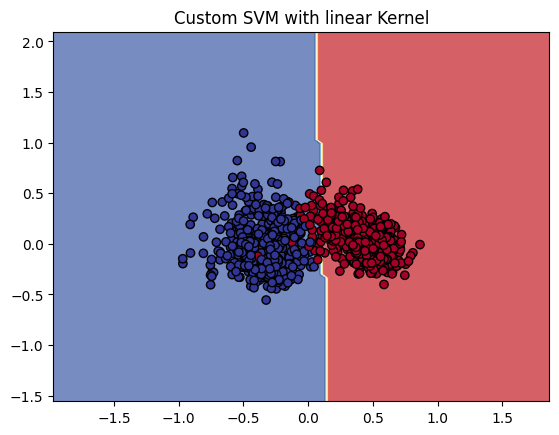

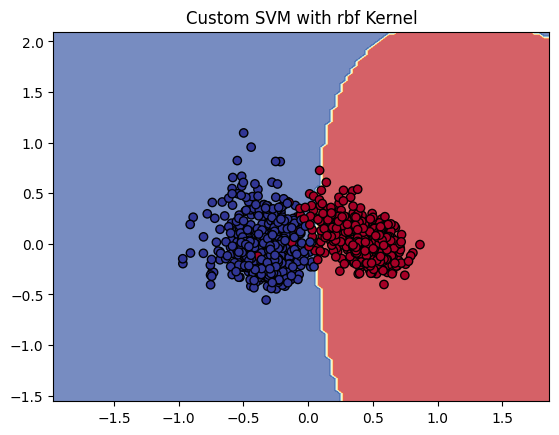

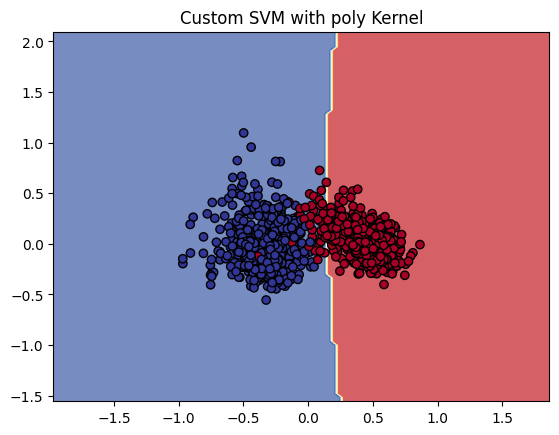

In [10]:
# Визуализация

xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 100),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 100))
for name, model in custom_models.items():
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.7, cmap='RdYlBu')
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pca, edgecolor='k', cmap='RdYlBu')
    plt.title(f"Custom SVM with {name} Kernel")
    plt.show()